# TITLE : PREDICTING BANK CUSTOMER CHURN USING PYTHON 

# Step-1 Business Problem Understanding
Analytical Report (Complete Analysis Report)


In [ ]:
DOMAIN : Banking/Finance/customer Analytics

GOAL : Predict which customer may leave the bank help customer loss 

⭐ Business Problem Understanding

The bank is facing a problem where some customers are leaving the bank by closing their accounts
This customer loss is known as churn  and it directly affects the banks revenue customer base and long term growth.

# To solve this issue the bank wants to:

-Understand why customers are leaving

-Identify the common factors that lead to churn

-Predict which customers are likely to leave in the future

-Take early actions to retain those customers

-By analyzing customer data the bank can reduce customer loss and improve customer satisfaction.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract

- Load/connect the raw data 
- Data Understanding
- Data Exploration

In [2]:
df = pd.read_csv(r"C:\Users\chint\OneDrive\Desktop\bank_churn.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.shape

(10000, 14)

In [4]:
# observation : total 10000 records with 14 columns

In [5]:
df.columns.tolist()

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [6]:
observation: All column names are as per syntax

SyntaxError: invalid syntax (2196114871.py, line 1)

In [7]:
df.columns = df.columns.str.strip()

In [8]:
df["RowNumber"].unique()

array([    1,     2,     3, ...,  9998,  9999, 10000], dtype=int64)

In [9]:
df["CustomerId"].unique()

array([15634602, 15647311, 15619304, ..., 15584532, 15682355, 15628319],
      dtype=int64)

In [10]:
df["Surname"].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [11]:
df["CreditScore"].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [12]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
df["Age"].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

In [15]:
df["Tenure"].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [16]:
df["Balance"].unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

In [17]:
df["NumOfProducts"].unique()

array([1, 3, 2, 4], dtype=int64)

In [18]:
df["HasCrCard"].unique()

array([1, 0], dtype=int64)

In [19]:
df["IsActiveMember"].unique()

array([1, 0], dtype=int64)

In [20]:
df["EstimatedSalary"].unique()

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [21]:
df["Exited"].unique()

array([1, 0], dtype=int64)

In [22]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [23]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [25]:
continous =['Balance', 'EstimatedSalary','CreditScore','Age','Tenure']

categorical = ['Surname', 'Geography', 'Gender']

count = ['RowNumber','CustomerId','NumOfProducts','Exited','HasCrCard','IsActiveMember']

In [26]:
df[continous].describe()

,Balance,EstimatedSalary,CreditScore,Age,Tenure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,76485.889288,100090.239881,650.528800,38.921800,5.012800
std,62397.405202,57510.492818,96.653299,10.487806,2.892174
min,0.000000,11.580000,350.000000,18.000000,0.000000
25%,0.000000,51002.110000,584.000000,32.000000,3.000000
50%,97198.540000,100193.915000,652.000000,37.000000,5.000000
75%,127644.240000,149388.247500,718.000000,44.000000,7.000000
max,250898.090000,199992.480000,850.000000,92.000000,10.000000


In [27]:
df[categorical].describe()

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [28]:
df.duplicated().sum()

0

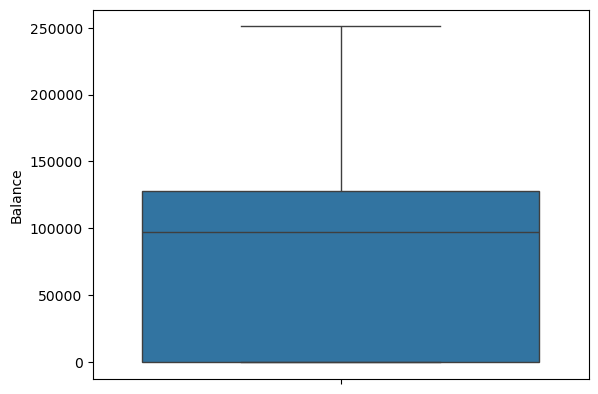

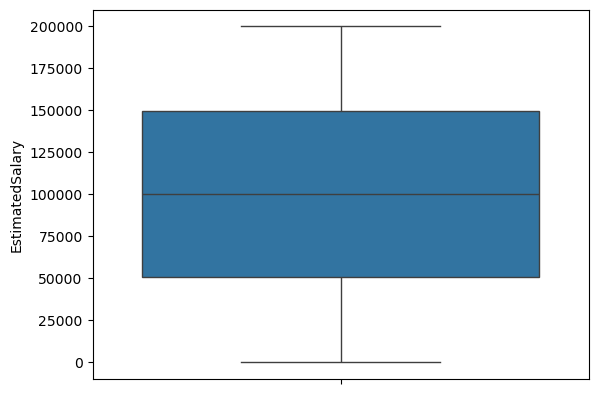

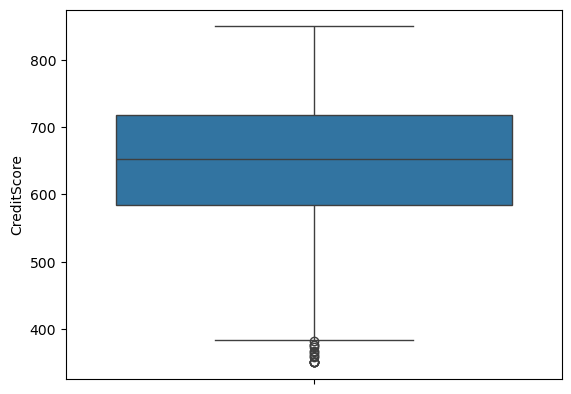

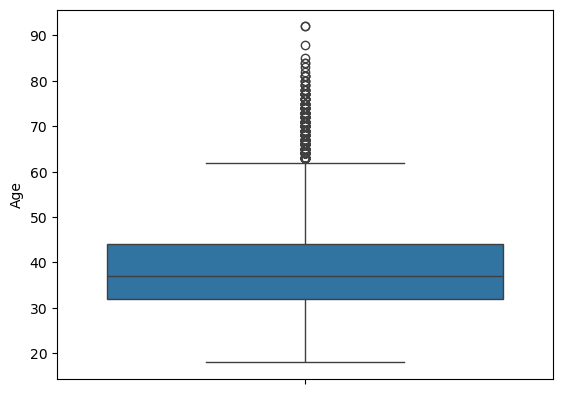

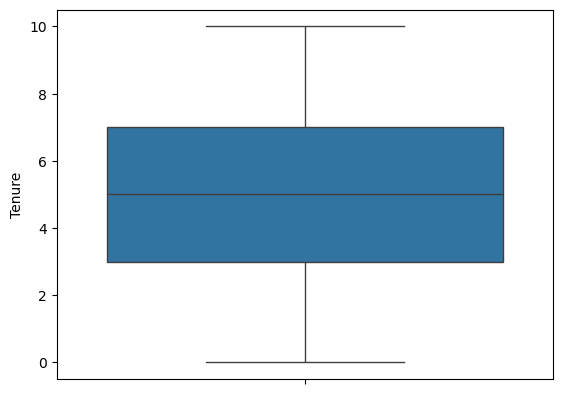

In [29]:
for i in continous:
    sns.boxplot(df[i])
    plt.show()

In [30]:
df[continous].skew()

Balance           -0.141109
EstimatedSalary    0.002085
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
dtype: float64

In [31]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Transform

- Data Cleaning
- Data Wrangling (if required)
- Column Selection
- Colum Addition (if required)

In [32]:
# Data Cleaning

In [33]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

**Treat the outliers**

In [34]:
Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['CreditScore'] < lower_limit) | (df['CreditScore'] > upper_limit)]
print("Outliers count:", outliers.shape[0])

Outliers count: 15


In [35]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_limit) | (df['Age'] > upper_limit)]
print("Outliers count:", outliers.shape[0])

Outliers count: 359


In [36]:
Q1 = df['Balance'].quantile(0.25)
Q3 = df['Balance'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['Balance'] < lower_limit) | (df['Balance'] > upper_limit)]
print("Outliers count:", outliers.shape[0])

Outliers count: 0


In [37]:
Q1 = df['EstimatedSalary'].quantile(0.25)
Q3 = df['EstimatedSalary'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['EstimatedSalary'] < lower_limit) | (df['EstimatedSalary'] > upper_limit)]
print("Outliers count:", outliers.shape[0])

Outliers count: 0


In [38]:
# create helpful categorical groups

In [39]:
# Age groups

In [40]:
def age_group(a):
    if a <= 25: return '0-25'
    if a <= 40: return '26-40'
    if a <= 60: return '41-60'
    return '60+'
df['AgeGroup'] = df['Age'].apply(age_group)

In [41]:
# Credit score category

In [42]:
def cs_cat(s):
    if s < 500: return 'Poor'
    if s < 650: return 'Average'
    if s < 750: return 'Good'
    return 'Excellent'
df['CreditScoreCat'] = df['CreditScore'].apply(cs_cat)

In [43]:
# Basic KPI Calculation

 1.Total no of customers 

In [44]:
Total_customers = df['CustomerId'].nunique()

In [45]:
Total_customers

10000

2.Number of churned customers 

In [46]:
churned_customers = df[df['Exited']==1].shape[0]
churned_customers

2037

In [ ]:
3.Churn Rate %

In [47]:
 #Total number of customers
total_customers = df.shape[0]

# Number of churned customers
churned_customers = df['Exited'].sum()

# Churn rate in %
churn_rate = (churned_customers / total_customers) * 100

print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 20.37%


In [ ]:
4.Average credit _score

In [48]:
avg_credit = df['CreditScore'].mean()
avg_credit

650.5288

In [ ]:
5.AVG Balance 

In [49]:
avg_balance = df['Balance'].mean()

In [50]:
avg_balance

76485.889288

In [51]:
#Remove unimportant columns

df = df.drop(columns=["RowNumber","Surname"])

In [52]:
# saved to clean file 

In [53]:
df.to_csv("cleaned_bank_data.csv",index=False)

In [54]:
df = pd.read_csv("cleaned_bank_data.csv")

In [55]:
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,CreditScoreCat
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-60,Average
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-60,Average
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-60,Average
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,26-40,Good
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-60,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,26-40,Excellent
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,26-40,Average
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,26-40,Good
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,41-60,Excellent


# Univariate

# 1.Credit Score


In [ ]:
What is the distribution of credit scores among customers?

In [56]:
df["CreditScore"].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

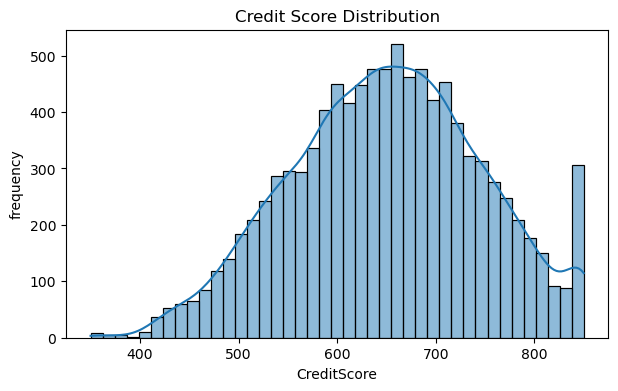

In [57]:
plt.figure(figsize=(7,4))
sns.histplot(df['CreditScore'], kde=True)
plt.title("Credit Score Distribution")
plt.ylabel("frequency")
plt.show()

# Observation:
Most customers have credit score between 580-720 formng a near normal distribution
very few customers fall in the extremely low or high credit score range 

# 2. Age
What age groups dominate the dataset?

In [ ]:
df["Age"].describe()

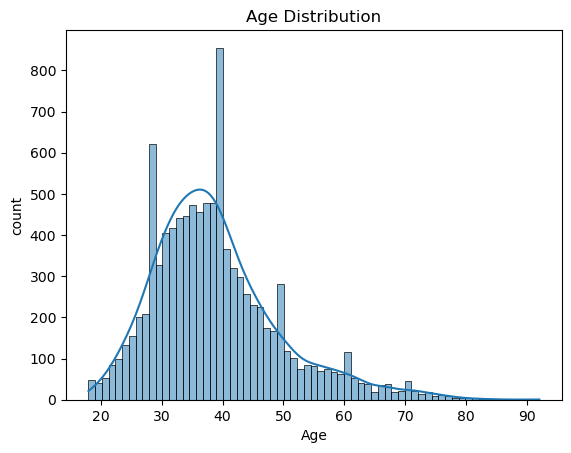

In [58]:
sns.histplot(df['Age'],kde=True)
plt.title("Age Distribution")
plt.ylabel("count")
plt.show()

# OBSERVATION :
Most customers fall in the age range 30-50 showing a concentrated middle age population
very few customers are below 20 or below 60 indicates fewer young and senior account holder

# 3. Tenure
How many years have most customers stayed with the bank?

In [60]:
df["Tenure"].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

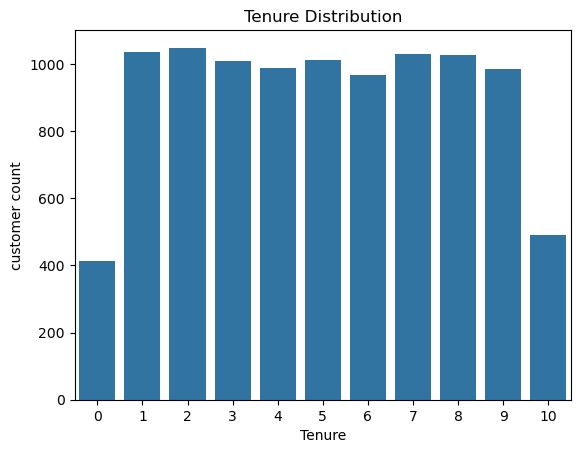

In [61]:
sns.countplot(x='Tenure', data=df)
plt.title("Tenure Distribution")
plt.ylabel("customer count")
plt.show()

# OBSERVATION:
MOst customer have a tenure of 1-3 years showing a high concentration of recently joined customers

4. Geography
Which region has the highest number of customers?

In [62]:
geo_counts = df["Geography"].value_counts()
geo_counts

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Text(0.5, 1.0, 'Customers by Geography')

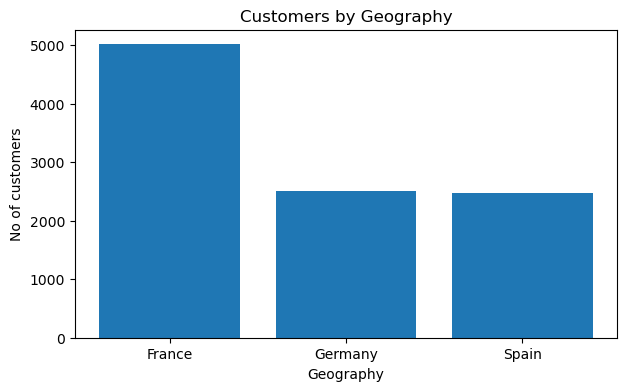

In [63]:
# ---- Create horizontal bar plot ----
plt.figure(figsize=(7,4))
plt.bar(geo_counts.index, geo_counts.values)
# Labels
plt.xlabel("Geography")
plt.ylabel("No of customers")
plt.title("Customers by Geography")

# Observation: 
france region dominates high no of customers followed by germany and spain 

 # 5. Gender
Is the dataset balanced between males and females?

In [65]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

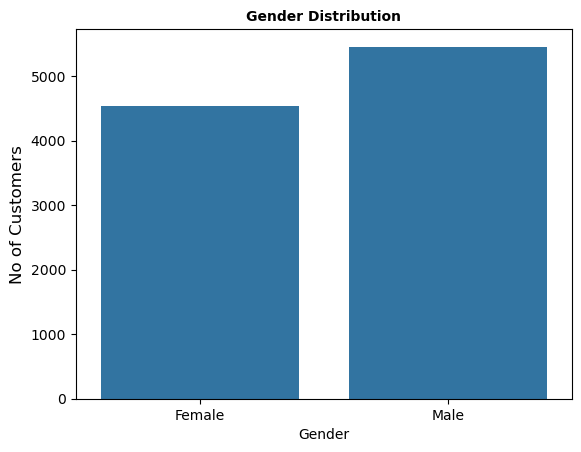

In [66]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution",fontsize=10, fontweight='bold')
plt.ylabel("No of Customers",fontsize=12)
plt.show()

# Observation:
The data seet has more male customers than female customers

# 6. Balance
What is the distribution of balance across customers?

In [67]:
df["Balance"].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

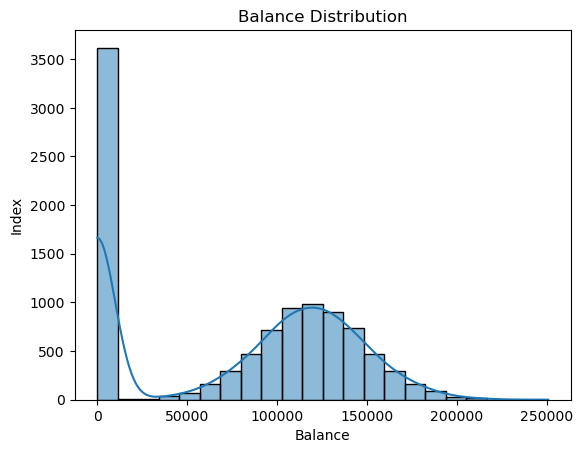

In [68]:
sns.histplot(df['Balance'], kde=True)
plt.title("Balance Distribution")
plt.ylabel("Index")
plt.show()

# Observation :
customer balance distribution is highly skewed to the right.
Most customers maintain low to moderate balances while a few have a significantly high balance
the minimum balance is zero indicating that some customers rarely use their accounts making them prone to churn


# 7. Number of Products
How many banking products do customers use?

In [70]:
df["NumOfProducts"].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

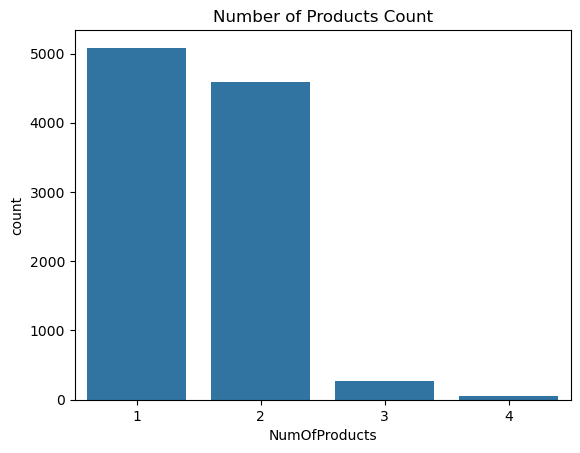

In [71]:
sns.countplot(x='NumOfProducts', data=df)
plt.title("Number of Products Count")
plt.show()


# OBSERVATION
Most customers use either 1 or 2 banking products with usage sharply decreasing for higher product counts
very few customers use 3 or 4 products

 # 8. Has Credit Card
How many customers own a credit card?

In [73]:
df["HasCrCard"].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

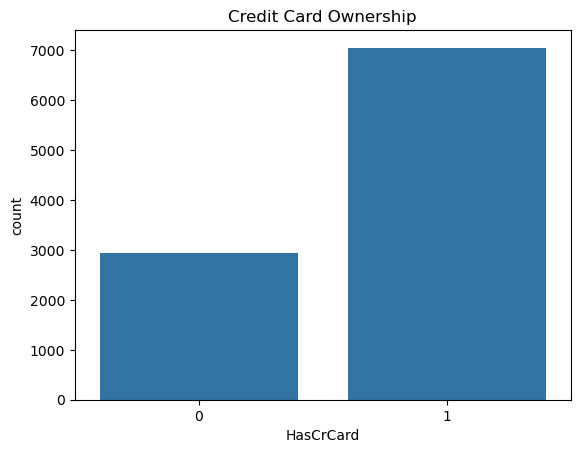

In [74]:
sns.countplot(x='HasCrCard', data=df)
plt.title("Credit Card Ownership")
plt.show()

# OBSERVATION:
Most  customers (70%) already own a credit card but 30% still do not 

 # 9. Is Active Member
Are most customers active or inactive?

In [75]:
df["IsActiveMember"].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

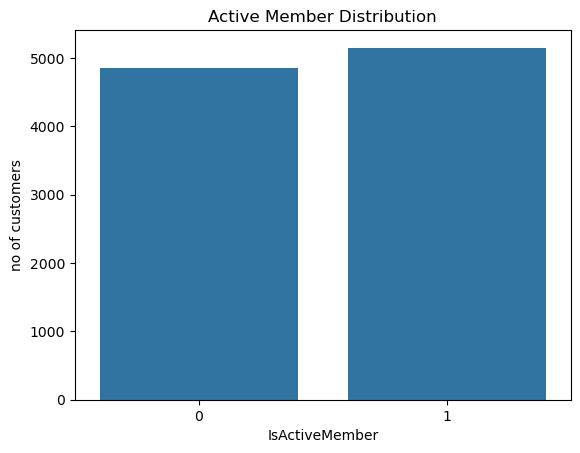

In [76]:
sns.countplot(x='IsActiveMember', data=df)
plt.title("Active Member Distribution")
plt.ylabel("no of customers")
plt.show()

# observation :
There are slightly more active customers than in active customers
active and in active counts are almost equal 

 # 10. Estimated Salary
How are salaries spread across the customers?

In [77]:
df["EstimatedSalary"].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

# observation :
Most customers have an estimated salary around 10000
salaries are spread out widely but overall the distribution looks almost even

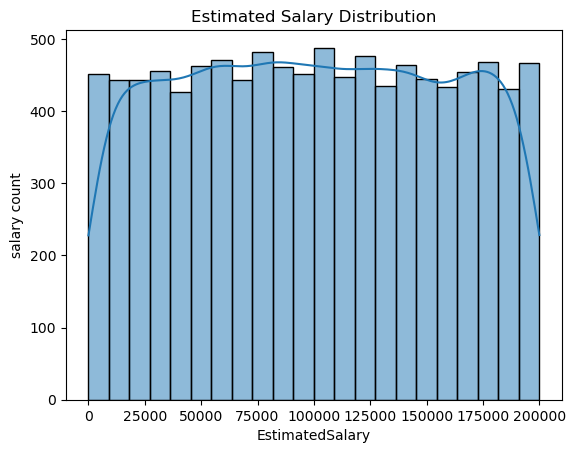

In [78]:
sns.histplot(df['EstimatedSalary'], kde=True)
plt.title("Estimated Salary Distribution")
plt.ylabel("salary count")
plt.show()

 # 11. Exited (Churn)
What percentage of customers churned?

In [81]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# observation:
2037 customers exited and 7963 customers stayed 
most customers did not Exit
only a smalll portion of customers have exited

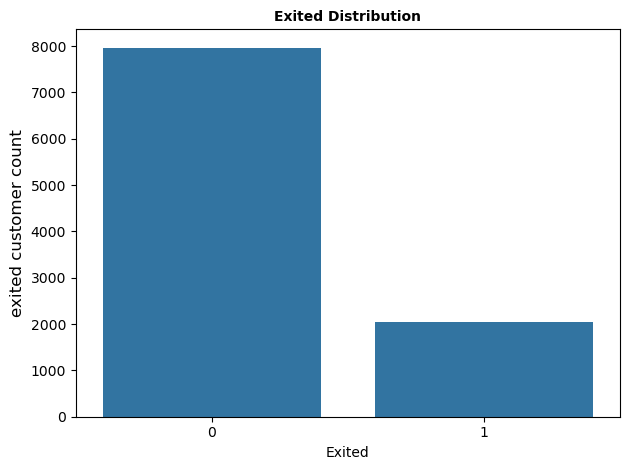

In [82]:
sns.countplot(x='Exited', data=df)
plt.title("Exited Distribution", fontsize=10, fontweight='bold')
plt.ylabel("exited customer count",fontsize=12)
# Show plot
plt.tight_layout()
plt.show()

# BIVARIATE PLOTS

# Exited  VS Age

In [ ]:
Are customers in a specific age group more likely to exited

In [83]:
data = df.groupby("Exited")["Age"].mean()
data

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

# OBSERVATION:
this means older customers are more likely to exit the bank

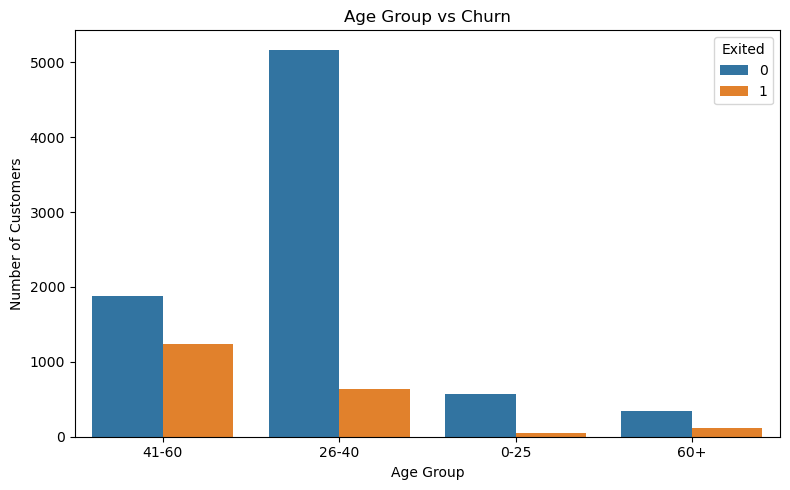

In [85]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='AgeGroup', hue='Exited')
plt.title('Age Group vs Churn')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# Exited vs Balance

In [ ]:
Do customers with very high or very low balances exited  more?

In [86]:
data = df.groupby("Exited")["Balance"].mean()
data

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

# Observation:
High balance customers are more likely to exit than low balance customers

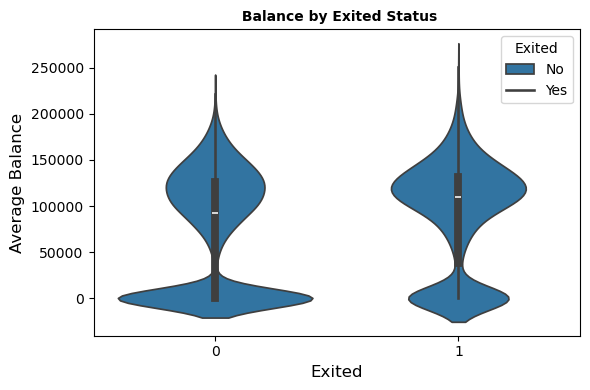

In [87]:
plt.figure(figsize=(6,4))
sns.violinplot(x="Exited", y="Balance", data=df)
# Add labels and title
plt.title(" Balance by Exited Status", fontsize=10, fontweight='bold')
plt.xlabel("Exited", fontsize=12)
plt.ylabel("Average Balance", fontsize=12)
# Add legend with clearer labels
plt.legend(title="Exited", labels=["No", "Yes"])
# Show plot
plt.tight_layout()
plt.show()

# Exited vs no of products

In [88]:
Which product range (1, 2, 3, 4) has the highest exited?

Object `exited` not found.


In [89]:
data = pd.crosstab(df["Exited"],df["NumOfProducts"])
data

NumOfProducts,1,2,3,4
Exited,,,,
0,3675,4242,46,0
1,1409,348,220,60


# Observation:
Customer with 1 product have the highest no of exit (1409)
customer with 2 products show much lower exit(348)
customer with 3 products show very low exit220&60
majority of non churned customers have 1 or 2 products but churn happens mainly among 1 product customers


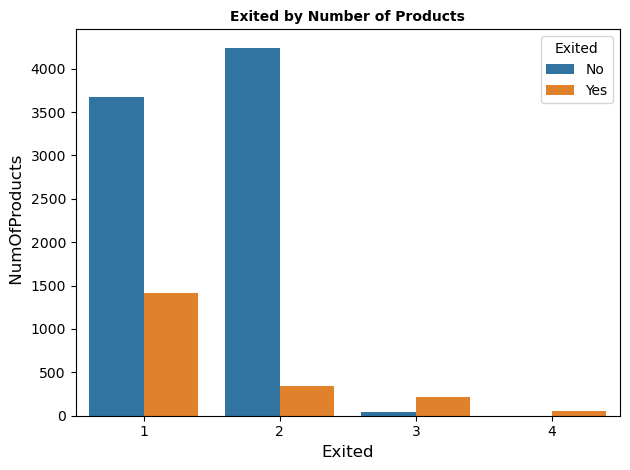

In [90]:
plt.figure()
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title("Exited by Number of Products",fontsize=10, fontweight='bold')
plt.xlabel("Exited", fontsize=12)
plt.ylabel(" NumOfProducts", fontsize=12)
plt.legend(title="Exited", labels=["No", "Yes"])
 #Show plot
plt.tight_layout()
plt.show()


# Exited vs Isactivemembers

In [91]:
Are inactive members more likely to leave the bank?

Object `bank` not found.


In [92]:
data = pd.crosstab(df["Exited"],df["IsActiveMember"])
data

IsActiveMember,0,1
Exited,,
0,3547,4416
1,1302,735


# observation:
Inactive (0) have high churn 1302customers exited
active customers (1) have lower churn 735 customers exited
majority of people who stay (exited = 0)are active member 4416 active vs 3547 inactive

conclusion:
Inactive members are more likely to leave the bank
active members show stronger loyalty and lower churn

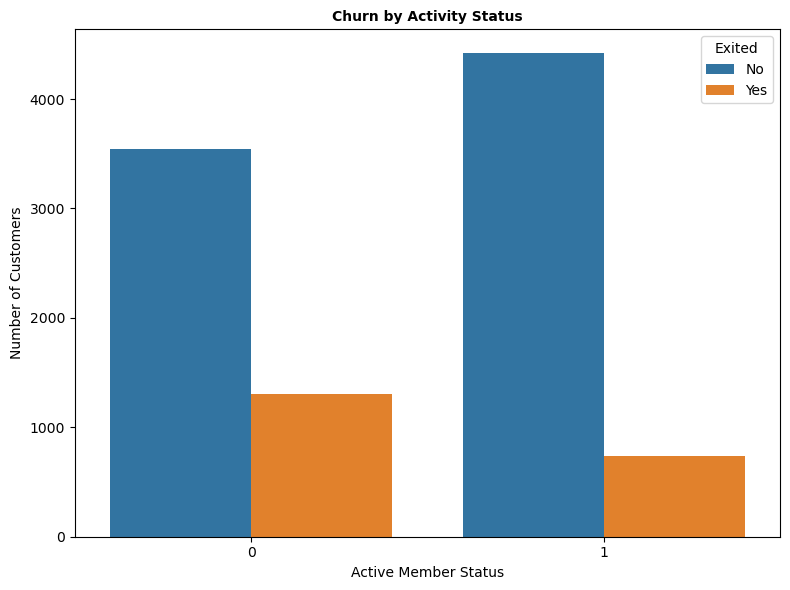

In [93]:
plt.figure(figsize=(8, 6))  # Adjust figure size for clarity
sns.countplot(x='IsActiveMember',hue='Exited',data=df)
# Add labels and title
plt.title("Churn by Activity Status", fontsize=10, fontweight='bold')
plt.xlabel("Active Member Status", fontsize=10)
plt.ylabel("Number of Customers", fontsize=10)
# Add legend with clearer labels
plt.legend(title="Exited", labels=["No", "Yes"])
# Show plot
plt.tight_layout()
plt.show()

# Tenure vs Exited

In [ ]:
which tenure groups are more likely to exit

In [95]:
ct = pd.crosstab(df['Tenure'], df['Exited'])
ct

Exited,0,1
Tenure,,
0,318,95
1,803,232
2,847,201
3,796,213
4,786,203
5,803,209
6,771,196
7,851,177
8,828,197


In [96]:
# Step 1: Calculate churn rate by tenure
tenure_churn = df.groupby('Tenure')['Exited'].mean().reset_index()
tenure_churn

,Tenure,Exited
0,0,0.230024
1,1,0.224155
2,2,0.191794
3,3,0.211100
4,4,0.205258
5,5,0.206522
6,6,0.202689
7,7,0.172179
8,8,0.192195
9,9,0.216463


# observation:
Overall 0-1 new customers are  most likely to exit while long term customers(5-7) are least likely to exit

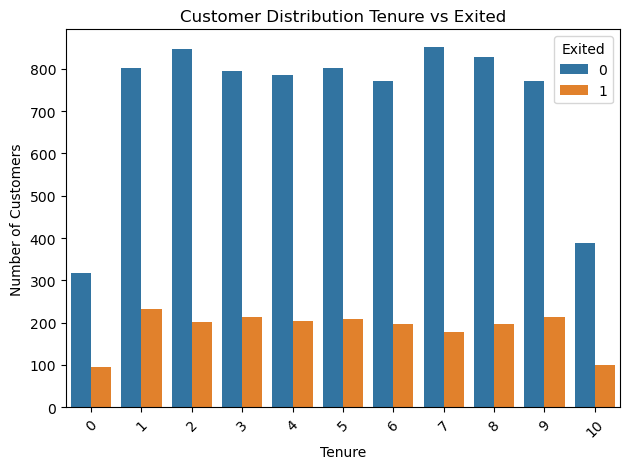

In [97]:
sns.countplot(data=df, x='Tenure', hue='Exited')
plt.title('Customer Distribution Tenure vs Exited')
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Exited')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

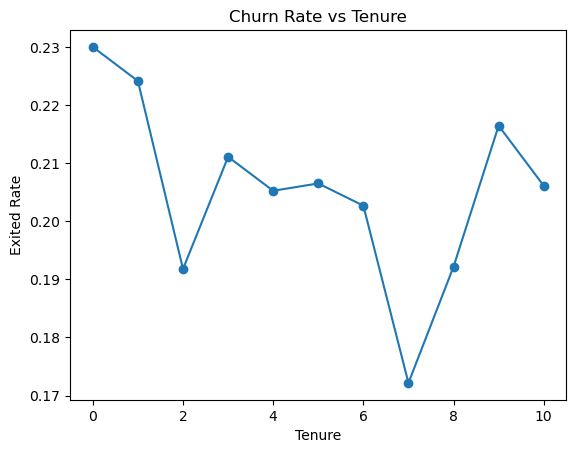

In [98]:
# Step 2: Simple line plot
plt.plot(tenure_churn['Tenure'], tenure_churn['Exited'], marker='o')
plt.title('Churn Rate vs Tenure')
plt.xlabel('Tenure')
plt.ylabel('Exited Rate')
plt.show()

# Gender vs Exited

In [99]:
Is exited higher among male or female customers?

Object `customers` not found.


In [100]:
# Step 1: Calculate churn rate by gender
gender_exited = df.groupby('Gender')['Exited'].mean().reset_index()
gender_exited

,Gender,Exited
0,Female,0.250715
1,Male,0.164559


# OBSERVATION:
Female customers shows a higher exited  rate than male customers

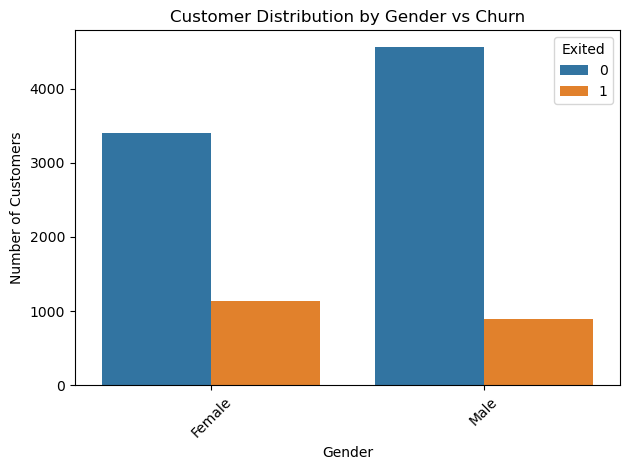

In [101]:
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Customer Distribution by Gender vs Churn')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Exited')
plt.tight_layout()
plt.show()

# Geography vs Exited

In [102]:
crosstab_geo = pd.crosstab(df['Geography'], df['Exited'], margins=True)
crosstab_geo

Exited,0,1,All
Geography,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7963,2037,10000


# Multivariate plots

In [ ]:
Which variable show the strongest seperation between churned and non churned customers in the pairplot 

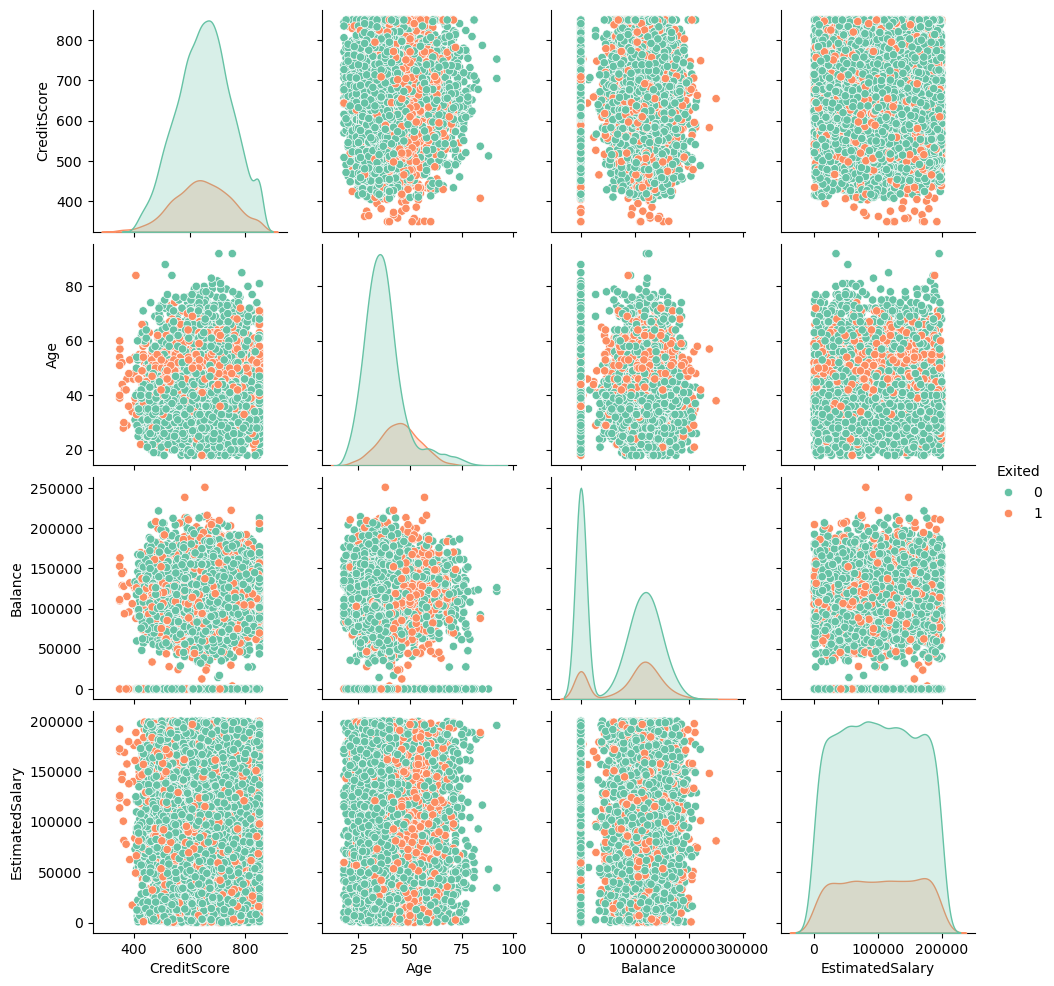

In [104]:
sns.pairplot(df[['CreditScore','Age','Balance','EstimatedSalary','Exited']], 
             hue='Exited', palette='Set2')
plt.show()

# Geography vs Gender vs Exited 

In [ ]:
How does Churn vary across Geography and Gender?

In [105]:
pd.crosstab([df['Geography'], df['Gender']], df['Exited'])

Exited               0    1
Geography Gender           
France    Female  1801  460
          Male    2403  350
Germany   Female   745  448
          Male     950  366
Spain     Female   858  231
          Male    1206  182

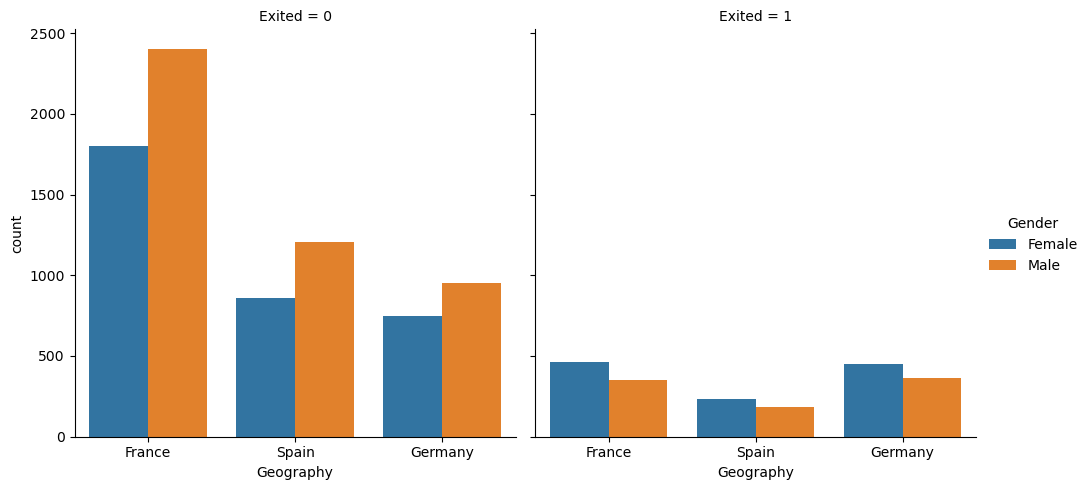

In [106]:
sns.catplot(data=df,x="Geography",hue="Gender",col="Exited",kind="count",height=5,aspect=1)
plt.show()

# Observation
Female customers consistently have a higher churn rate than male customers 
germany has the highest churn over all especially among females 

# Age VS Balance VS Exited 

In [107]:
How does Age relate to Balance for churned vs non-churned customers?

Object `customers` not found.


In [108]:
df.groupby('Exited')[['Age', 'Balance']].mean()

,Age,Balance
Exited,,
0,37.408389,72745.296779
1,44.837997,91108.539337


# Observation
Older customers with higher account balances are more likely to leaves

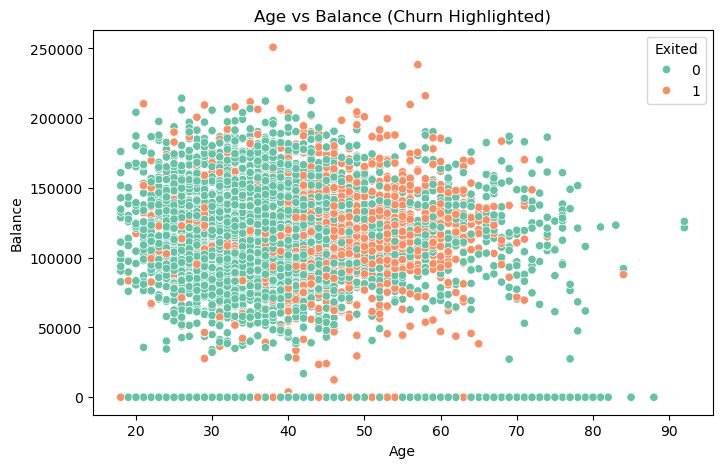

In [109]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited', palette='Set2')
plt.title("Age vs Balance (Churn Highlighted)")
plt.show()

# Exited vs Gender vs Balance

In [110]:
Ques: What is the distribution of Balance across Gender and Churn status?

Object `status` not found.


In [111]:
df.groupby(['Gender', 'Exited'])['Balance'].mean()

Gender  Exited
Female  0         71183.249639
        1         89036.639359
Male    0         73911.607037
        1         93736.483742
Name: Balance, dtype: float64

In [112]:
# Observation
Customers with higher balances ----regardless of gender are more likely to churn

SyntaxError: invalid syntax (723979657.py, line 2)

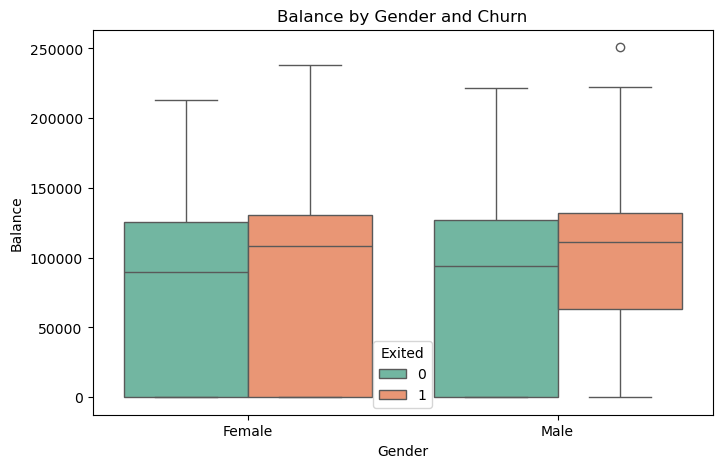

In [113]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Gender', y='Balance', hue='Exited', palette='Set2')
plt.title("Balance by Gender and Churn")
plt.show()

# Geography vs Age vs Exited

In [114]:
Question: How does Age vary by Geography and Churn?

Object `Churn` not found.


In [115]:
df.groupby(['Geography', 'Exited'])['Age'].mean()

Geography  Exited
France     0         37.235966
           1         45.133333
Germany    0         37.311504
           1         44.894349
Spain      0         37.839147
           1         44.147700
Name: Age, dtype: float64

# Observation
Across all geographies churned customers are older on average than non churned customers

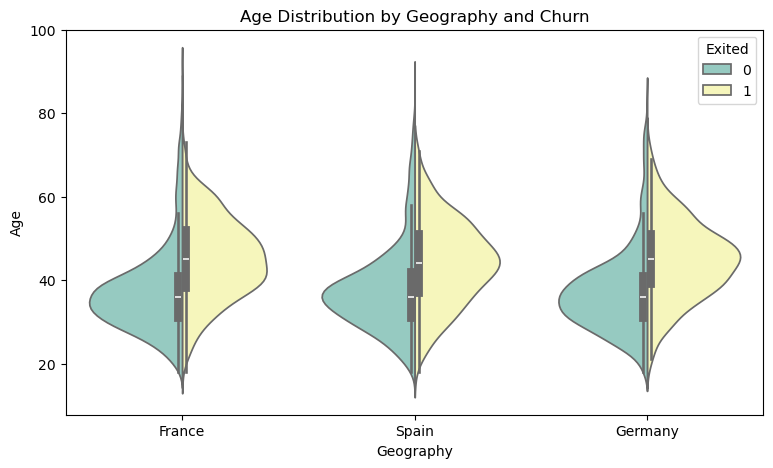

In [116]:
plt.figure(figsize=(9,5))
sns.violinplot(data=df, x='Geography', y='Age', hue='Exited', split=True, palette='Set3')
plt.title("Age Distribution by Geography and Churn")
plt.show()

# Age vs no of products vs exited vs balance

In [117]:
Question: Are older customers with more products more likely to churn?

Object `churn` not found.


In [118]:
df.groupby(['NumOfProducts', 'Exited'])[['Age', 'Balance']].mean()

Age        Balance
NumOfProducts Exited                          
1             0       37.665034  101052.817176
              1       44.910575   92028.819787
2             0       37.187176   48731.131304
              1       44.658046   90252.357155
3             0       37.304348   25744.263913
              1       44.427273   85853.087091
4             1       45.683333   93733.135000

# observation
Across all products groups customers who exited are older and maintain significantly 
higher balances compared to those who stayed


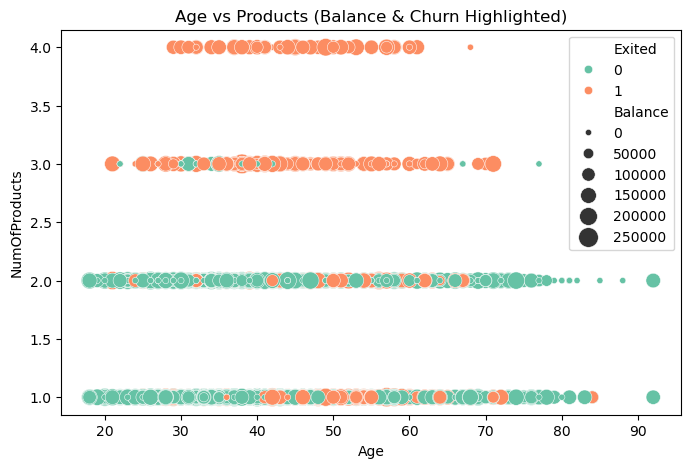

In [119]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='NumOfProducts', 
                hue='Exited', size='Balance', sizes=(20,200), palette='Set2')
plt.title("Age vs Products (Balance & Churn Highlighted)")
plt.show()


# Creditscore vs Balance vs Exited

In [120]:
Question: How do Credit Score and Balance change with Churn?

Object `Churn` not found.


In [121]:
df.groupby('Exited')[['CreditScore', 'Balance']].mean()

,CreditScore,Balance
Exited,,
0,651.853196,72745.296779
1,645.351497,91108.539337


In [122]:
# Observation
Customer with higher balance (91,108.54) and slightly lower credit score (645.35) has exited,
while the customer with lower balance (72,745.30) and slightly higher credit score (651.85) has not exited.

SyntaxError: invalid syntax (1467882310.py, line 2)

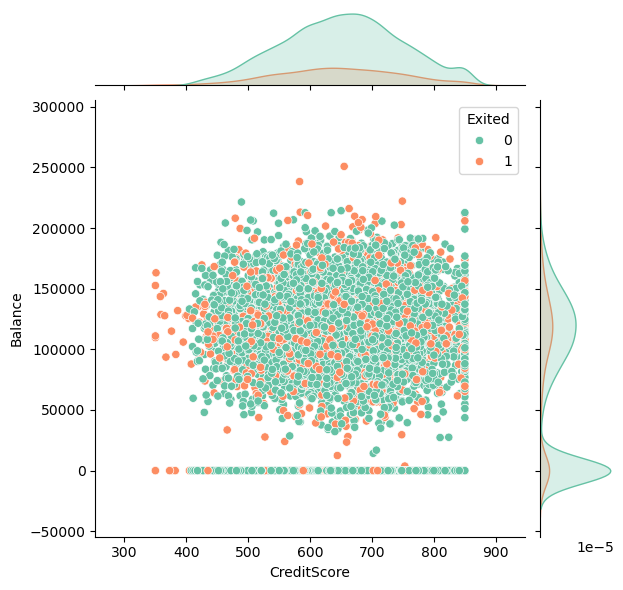

In [123]:
sns.jointplot(data=df, x='CreditScore', y='Balance', hue='Exited', palette='Set2')

# Exited vs Tenure vs no of products

In [124]:
Question: Which combinations of Tenure and Balance show the highest churn?

Object `churn` not found.


In [125]:
pivot_churn = (df.groupby(['Tenure', 'NumOfProducts'])['Exited'].agg(['mean', 'count']).reset_index())
pivot_churn

,Tenure,NumOfProducts,mean,count
0,0,1,0.283898,236
1,0,2,0.128655,171
2,0,3,1.000000,6
3,1,1,0.295775,568
4,1,2,0.081206,431
5,1,3,0.781250,32
6,1,4,1.000000,4
7,2,1,0.295983,473
8,2,2,0.060773,543
9,2,3,0.809524,21


# Observation 
- Churn likelihood increases sharply with product count.
- Tenure has minimal impact compared to product count.
- Risk profile:
- Lowest risk → 2 products
- Moderate risk → 1 product
- Highest risk → 3–4 products


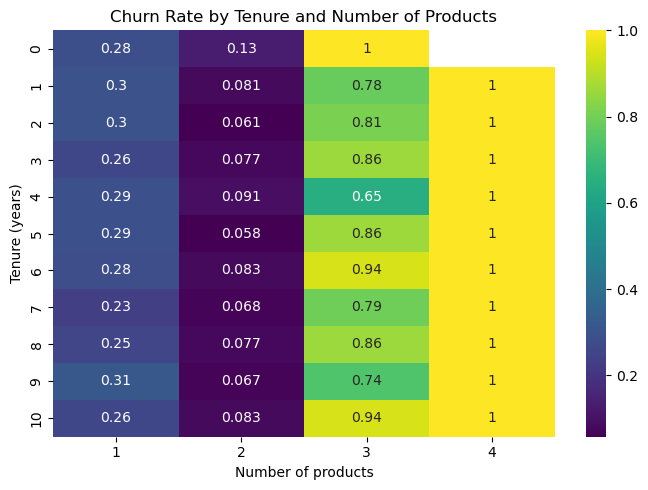

In [126]:
pivot = df.pivot_table(values='Exited', index='Tenure', columns='NumOfProducts', aggfunc='mean')
plt.figure(figsize=(7,5))
sns.heatmap(pivot, annot=True, cmap='viridis')
plt.title("Churn Rate by Tenure and Number of Products")
plt.ylabel('Tenure (years)')
plt.xlabel('Number of products')
plt.tight_layout()
plt.show()
plt.show()


# Credit score vs salary vs exited

In [127]:
Question: Does Salary combined with Credit Score affect churn?

Object `churn` not found.


In [128]:
grouped = df.groupby(['EstimatedSalary','CreditScore'])['Exited'].mean().reset_index()
grouped

,EstimatedSalary,CreditScore,Exited
0,11.58,709,1.0
1,90.07,625,0.0
2,91.75,645,1.0
3,96.27,710,0.0
4,106.67,629,0.0
...,...,...,...
9995,199909.32,620,0.0
9996,199929.17,569,0.0
9997,199953.33,608,0.0
9998,199970.74,639,0.0


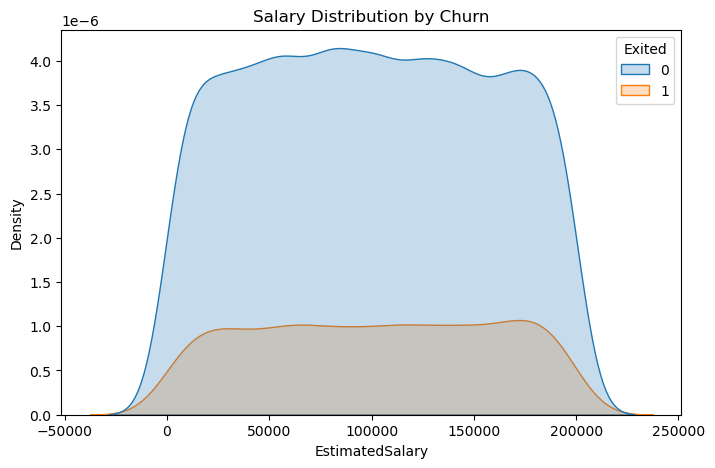

In [129]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='EstimatedSalary', hue='Exited', fill=True)
plt.title("Salary Distribution by Churn")
plt.show()


# Exited vs Isactive Members vs no of products

In [130]:
Question: Does Active Membership change churn patterns by product count?


Type:        list
String form: ['RowNumber', 'CustomerId', 'NumOfProducts', 'Exited', 'HasCrCard', 'IsActiveMember']
Length:      6
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.

In [131]:
cross = pd.crosstab(df['NumOfProducts'], df['IsActiveMember'], normalize='index')
cross

IsActiveMember,0,1
NumOfProducts,,
1,0.495869,0.504131
2,0.467102,0.532898
3,0.575188,0.424812
4,0.516667,0.483333


# Observation
- NumOfProducts = 1 → Active and inactive members are nearly equal, with a slight tilt toward active.
- NumOfProducts = 2 → Active members are clearly dominant, suggesting stronger engagement at this level.
- NumOfProducts = 3 → Inactive members become the majority, indicating possible  when customers hold 3 products.
- NumOfProducts = 4 → The split is balanced again, with a small lean toward inactive.


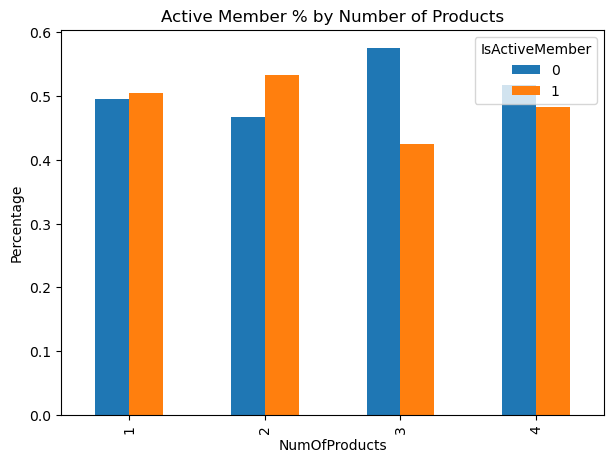

In [132]:
cross.plot(kind='bar', figsize=(7,5))
plt.title("Active Member % by Number of Products")
plt.ylabel("Percentage")
plt.show()


In [133]:
# HEATMAP

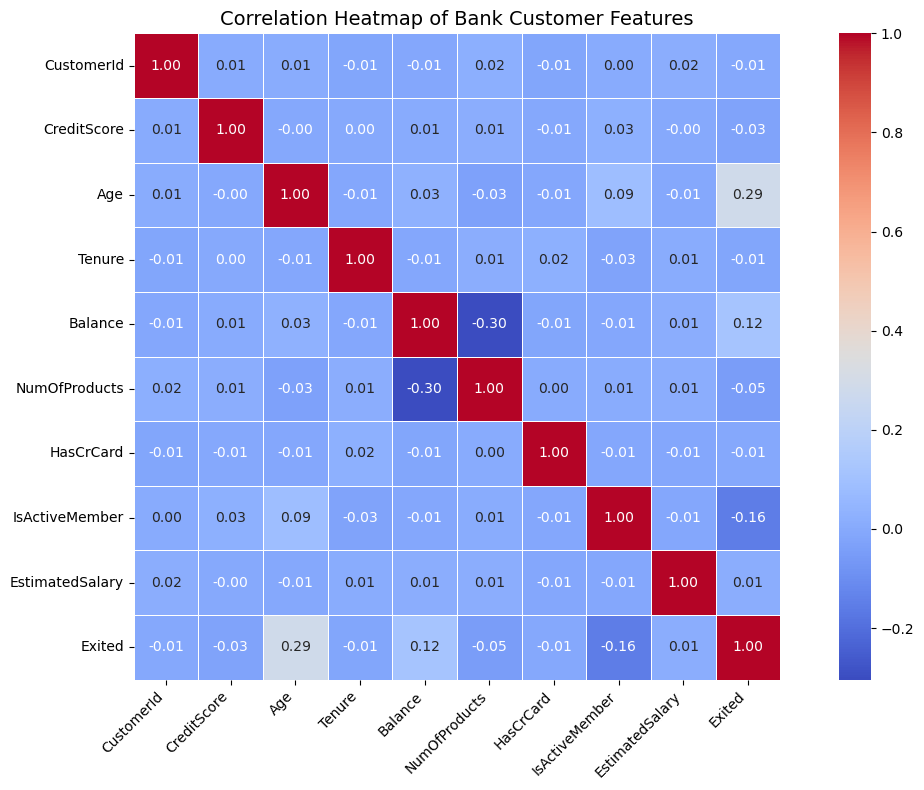

In [134]:
# Compute correlation
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))

sns.heatmap(
    corr,
    annot=True,            # show numbers
    fmt=".2f",             # decimal format
    cmap="coolwarm",       # same blue-red palette
    linewidths=0.5,
    square=True,
    cbar=True
)

plt.title("Correlation Heatmap of Bank Customer Features", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()